# Adam Trentowski - 162602 - Machine Learning
## lab_03/2
## Library Imports

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import mean

## Load dataset

In [6]:
dataset = pd.read_csv('VLagun_Phys_Years3.csv')
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


## Isolation of X and Y

In [7]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [8]:
X.shape, y.shape

((120, 8), (120,))

## Dataset split into train/test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [11]:
features, targets = X, y

## Functions to get dataset, create model and evaluation

In [12]:
def get_dataset(n_samples=120):
    X, y = make_classification(
        n_samples=n_samples, n_features=7, n_classes=2, random_state=1
    )
    return X, y

In [13]:
def get_model():
    model = LogisticRegression()
    return model

In [16]:
def evaluate_model(cv):
    X, y = get_dataset()
    model = get_model()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return mean(scores), scores.min(), scores.max()

## Calculation of the best test condition

In [17]:
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

Ideal: 0.867


## Define fold ranges to test

In [18]:
folds = range(2, 31)
means, mins, maxs = list(), list(), list()

## Evaluatr each k value

In [19]:
for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    k_mean, k_min, k_max = evaluate_model(cv)
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))

    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, accuracy=0.833 (0.817,0.850)
> folds=3, accuracy=0.883 (0.825,0.925)
> folds=4, accuracy=0.867 (0.767,0.967)
> folds=5, accuracy=0.883 (0.792,1.000)
> folds=6, accuracy=0.867 (0.750,1.000)
> folds=7, accuracy=0.866 (0.647,1.000)
> folds=8, accuracy=0.858 (0.667,1.000)
> folds=9, accuracy=0.866 (0.615,1.000)
> folds=10, accuracy=0.867 (0.583,1.000)
> folds=11, accuracy=0.868 (0.636,1.000)
> folds=12, accuracy=0.867 (0.600,1.000)
> folds=13, accuracy=0.866 (0.556,1.000)
> folds=14, accuracy=0.862 (0.667,1.000)
> folds=15, accuracy=0.867 (0.500,1.000)
> folds=16, accuracy=0.869 (0.500,1.000)
> folds=17, accuracy=0.867 (0.429,1.000)
> folds=18, accuracy=0.872 (0.571,1.000)
> folds=19, accuracy=0.866 (0.500,1.000)
> folds=20, accuracy=0.867 (0.500,1.000)
> folds=21, accuracy=0.871 (0.500,1.000)
> folds=22, accuracy=0.867 (0.400,1.000)
> folds=23, accuracy=0.857 (0.400,1.000)
> folds=24, accuracy=0.858 (0.400,1.000)
> folds=25, accuracy=0.864 (0.400,1.000)
> folds=26, accuracy=0.8

## Visualization

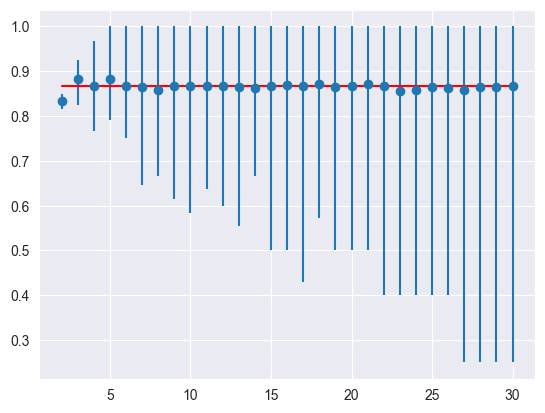

In [21]:
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()

Best accuracy scores:
```
> folds=3, accuracy=0.883 (0.825,0.925)
...
> folds=5, accuracy=0.883 (0.792,1.000)
```
so, the best k is = 3.